<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<div class="alert alert-info"> <b>
В первом пункте изучим данные и определим, как переработать их для дальнейших исследований

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/anikin/Downloads/real_estate_data.csv',sep='\t') # открываем файл с исрользованием разделения

In [3]:
data.shape[0] 

23699

In [4]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**При первом взгляде наблюдаются значения NAN,  не целые числа, там где по логике они быть не должны, это всё нам предстоит исправить во втором шаге**

In [5]:
print(data.info()) # выводим информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**После просмотра информации о данных мы видим занчения форама float64 (вещественные числа) вместо int64 (целые числа) в параметре floors_total, исходя из логических соображений - количество этажей не может быть не целым числом, их нужно будет уточнить, и проваерить более детально остальную информацию.**


In [6]:
print(data.isna().sum()) # Проверим количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**В столбцах  - ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest,   parks_around3000, parks_nearest, ponds_around3000,  ponds_nearest и days_exposition  Обнаружены пропуски.**

**Там, где это возможно и необходимо их нужно будет заполнить,**  

**Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0
Если не указан аэропорт, то он не указан вообще по всему населенному пункту, потому что его нет**

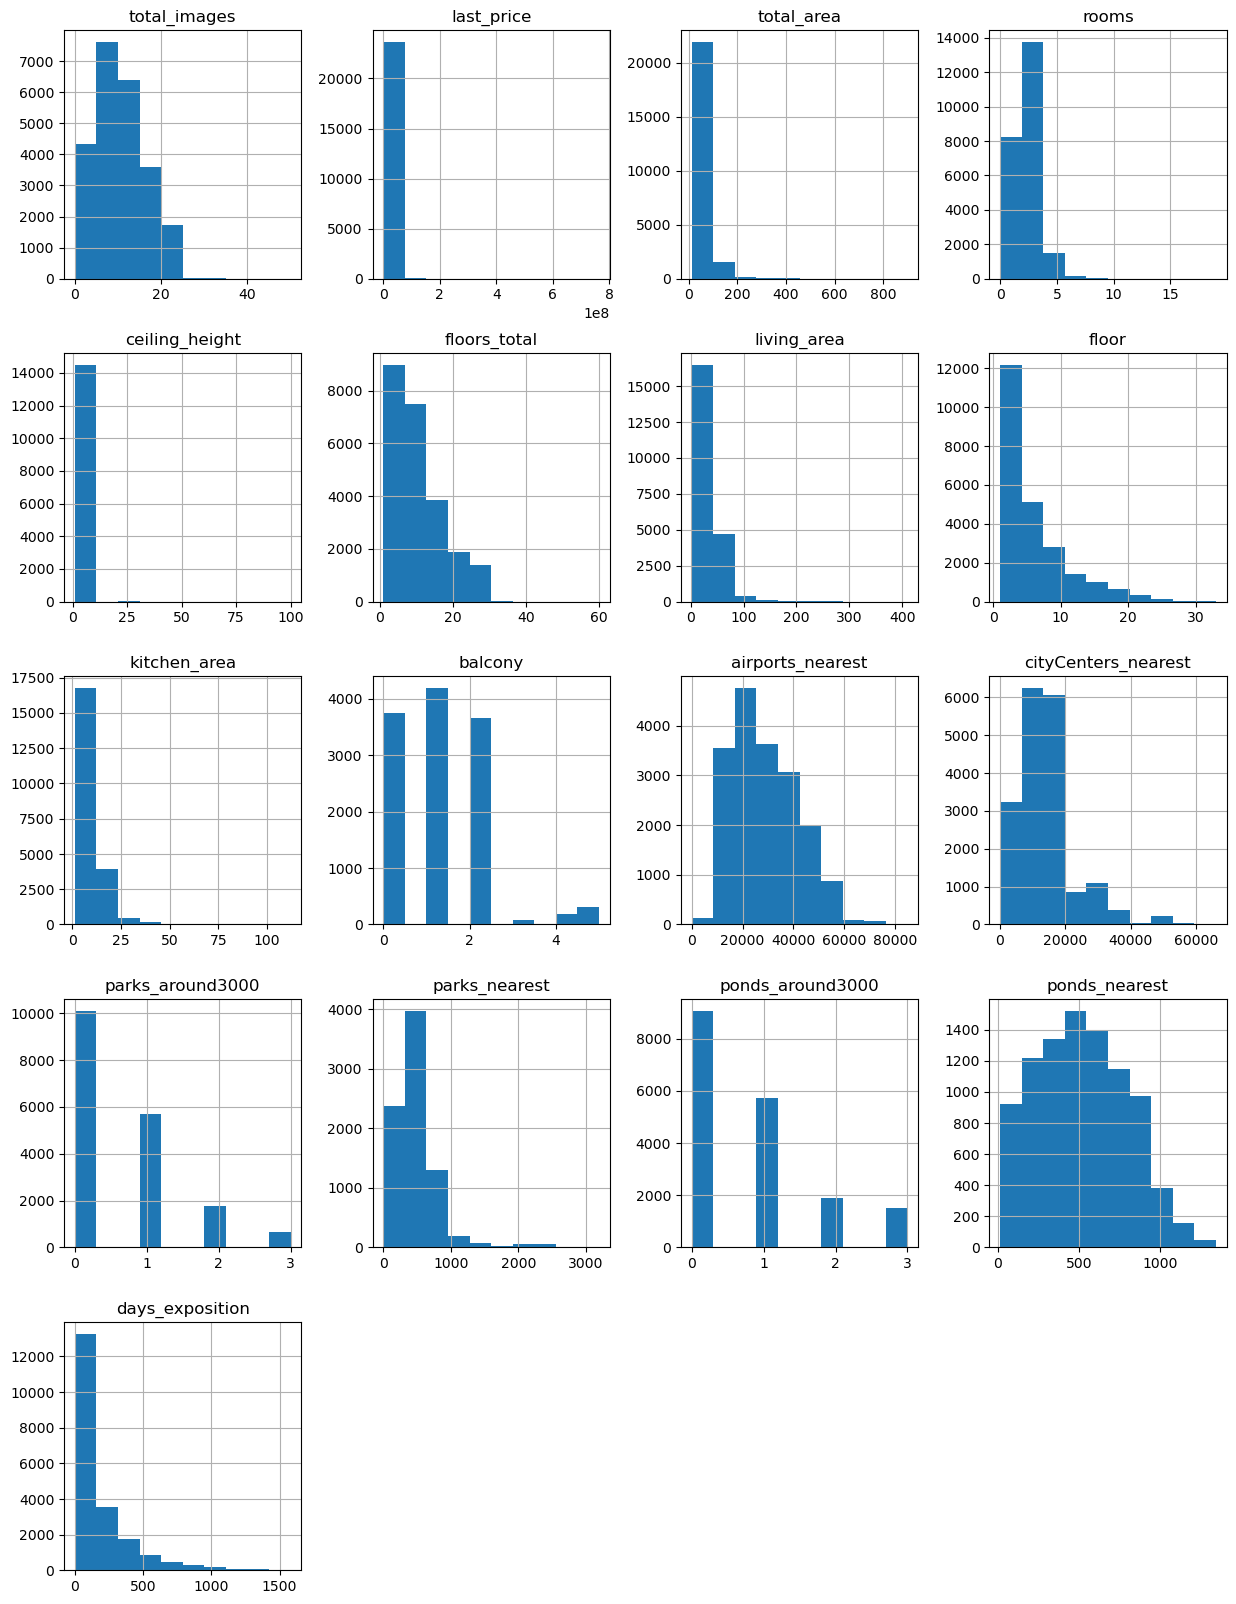

In [7]:
data.hist(figsize=(15, 20));  # Выведем первые Гистограамы

In [8]:
print(data.describe()) # Выведем информацию о столбах

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД: Исходя из полученной выше информации на гистограммах мы  видим распределения смещенные в лево, а числовые описания, которое выдаёт метод describe, говорит нам об аномальных значениях в столбце ceiling_height с max высотой потолка в 100 метров или квартира площадью 900 метров в столбе total_area

### Предобработка данных

<div class="alert alert-info"> <b>
    
    ЦЕЛЬ :
    1. Найти и изучить пропущенные значения в столбцах, 
    2. Рассмотреть типы данных в каждом столбце, 
    3. Изучить уникальные значения в столбце с названиями,
    4. Устраните неявные дубликаты и выбивающиеся значения

**Начнём со столбца floors_total, в неём присутсивуют значения nan, заменим их на значения 1 методом fillna, можно  предположить, что не заполняли количество этажей, если было 1**

In [9]:
print(data['floors_total'].unique())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


In [10]:

# Проверим уникальыне значения

print(data['floors_total'].unique())

# Самый высокий этаж 60,  что в полне реально с учетом самого высокого здания в России Лахта цента, состощего из 88 этажей

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


In [11]:
# Проверяем пропуски
print(data['floors_total'].isna().sum())


86


In [12]:
# Меняем тип данных


**Разберём столбец ceiling_height**

In [13]:
print(data['ceiling_height'].unique())

# Имеются, занчения не возможные для высоты потолка

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

In [14]:
# Исправим это при помощи loc - 'ceiling_height', если значения больше 20, то поделим его на 10

data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10


In [15]:
ceiling_height_median = data['ceiling_height'].median() # Пропуски заменим медианным значенем, для сохранности логики
print(ceiling_height_median)
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

2.65


In [16]:
print(data['ceiling_height'].unique()) # Проверим уникальные значения столбца

[ 2.7   2.65  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5   3.3
  2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.06  2.72  2.54  2.51
  2.78  2.76  2.58  3.7   2.52  5.2   2.87  2.66  2.59  2.    2.45  3.6
  2.92  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74  2.96
  2.46  5.3   5.    2.79  2.95  4.06  2.94  3.82  3.54  3.53  2.83  4.7
  2.4   3.38  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48  2.62
  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66  3.85
  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37  3.09
  8.    3.26  3.34  2.81  3.44  2.97  3.14  4.37  2.68  3.22  3.27  4.1
  2.93  3.46  3.47  3.33  3.63  3.32  1.2   8.3   2.98  2.86  3.17  4.4
  3.28  3.04  4.45  5.5   3.84  3.23  3.02  3.21  3.43  3.78  4.3   3.39
  2.69  3.31  4.65  3.56  2.2   3.51  3.93  3.42  2.99  3.49 14.    4.14
  2.91  3.88  1.75  4.25  3.29 20.    2.25  3.76  3.69  

**Оставшиеся значения подходят под реальные объекты, высокие вполне возможно - ангары в портах, а самые низкие подвальными помещениями
Пропуски заменим медианным значением по всей выборке высоты потолков, она полуучилась 2,65 что так же выглядит правдоподобно**

**Столбец balcony исправим тип данных и заполним пропуски значением 0,если продавец не указал число балконов, то, скорее всего, в его квартире их нет**

In [17]:
data['balcony'] = data['balcony'].fillna("0")
data['balcony'] = data['balcony'].astype(int)

In [18]:
print(data['balcony'].unique())

[0 2 1 5 4 3]


**Столбец airports_nearest - округим значения и переведем тип данных**

In [19]:
data['airports_nearest'].round().astype("Int64")

0        18863
1        12817
2        21741
3        28098
4        31856
         ...  
23694    24665
23695     <NA>
23696     <NA>
23697    39140
23698     <NA>
Name: airports_nearest, Length: 23699, dtype: Int64

**Уточняем информацию в остальных столбцах**

In [20]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

**locality_name приведем к единомуу формату данные**

In [21]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской', '')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок имени', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'снт')
data['locality_name'] = data['locality_name'].str.replace(' поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджныйпоселок', 'коттеджный поселок')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', 'снт')

In [22]:
print(data.isna().sum()) # Проверяем

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


<div style="border:solid blue 2px; padding: 20px">
    
ВЫВОД: 
    
    1. Пропущенные значения выявлены и заменены или удалены исходя из логики значений в столбце
    2. Типы данных изменены так же согласно логики значений
    3. Названия Городов и сёл выстроены в едином формате
    4. Устранены неявные дубликаты и выбивающиеся значения

### Посчитайте и добавьте в таблицу новые столбцы

<div class="alert alert-info"> <b>
ЦЕЛЬ :
    
Добавить в таблицу новые столбцы со следующими параметрами:
    
1. цена одного квадратного метра;
2. день недели публикации объявления;
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

**Цена одного квадратного метра равна отношению цены на площадь**

In [23]:
data['price_metr'] = data['last_price']/data['total_area']# Создаём переменную цена метра
data['price_metr'] = data['price_metr'].astype('int') # Меняем тип на целое число
print(data['price_metr'].head(10)) # Проверяем

0    120370
1     82920
2     92785
3    408176
4    100000
5     95065
6     99195
7    110544
8     87454
9     88524
Name: price_metr, dtype: int64


In [24]:
print('Средняя цена квадратного метра по всей выборке -', data['price_metr'].mean())

Средняя цена квадратного метра по всей выборке - 99405.39104604286


**Создаём столбцы с днём, месяцем и годом объявления**

In [25]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%d %H:%M'
) # Задаём понятный формат

data['week_day_exposition'] = data['first_day_exposition'].dt.weekday # Используем встроенные алгоритмы

display(data['week_day_exposition'].head(5)) # Проверяем
print(data['week_day_exposition'].unique()) # Проверяем

0    3
1    1
2    3
3    4
4    1
Name: week_day_exposition, dtype: int64

[3 1 4 0 2 6 5]


**повторяем для месяца и года**

In [26]:
data['month_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
print(data['month_day_exposition'].unique())

[ 3 12  8  7  6  9 11  4  5  2  1 10]


In [27]:
data['yers_exposition'] =  data['first_day_exposition'].dt.year
print(data['yers_exposition'].unique())

[2019 2018 2015 2017 2016 2014]


**Создаём колонкм - типы этажей квартиры**

In [28]:
# Создаём функцию, которая установит значения этажей

def categoriya_flors(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else: return 'другой'
data['categoriya_flors'] = data.apply(categoriya_flors, axis = 1)

print(data['categoriya_flors'].unique()) # Проверяем


['другой' 'первый' 'последний']


**Высчитываем расстояние до центра города. Перевести в метры можно разделив на 1000 и поменяв тип данных на целое число**

In [29]:

data['cityCenters_nearest'] = data['cityCenters_nearest']/1000

print(data['cityCenters_nearest'].unique()) # Проверяем

[16.028 18.603 13.933 ... 27.977  7.262  6.263]


<div style="border:solid blue 2px; padding: 20px">
ВЫВОД:
    
1. Средняя цена одного квадратного метра по всей выборке = 101376;
2. Добавлены столбы с днём, месяцем и годом публицации;
5. Добавлены типы этажей квартир;
6. Добавленая колонка - расстояние до центра города.

### Проведите исследовательский анализ данных

<div class="alert alert-info"> <b>
ЦЕЛЬ :
Исследовать данные, отобразить зависимости, корреляции различных величин и описать наблюдения за данными.

**Исследуем данные используя гистограамы методома plot, hist и describe**

count    23335.000000
mean        58.126632
std         26.449663
min         12.000000
25%         40.000000
50%         51.700000
75%         68.760000
max        199.200000
Name: total_area, dtype: float64

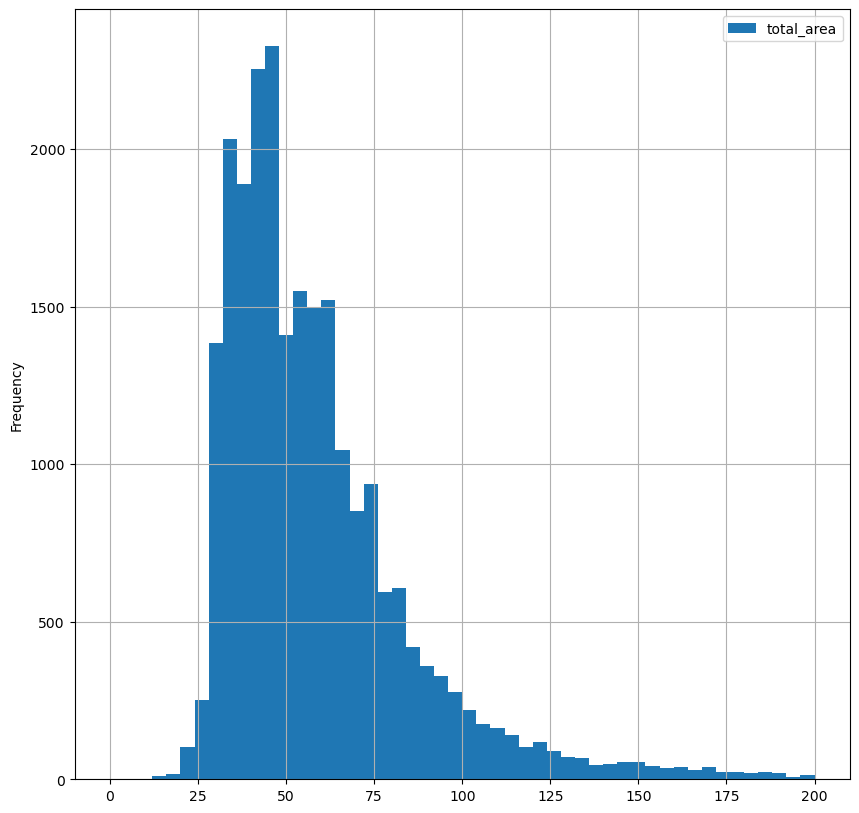

In [30]:
# общая площадь
data = data[data['total_area'] < 200] # Уберем уиз выборки значения артефакты
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (10,10), range = (0,200)) # Применим метод plot
data['total_area'].describe() # Выведем список характерных значений

*Общая площадь выборки в диапозоне от 12 до 200 метров - средняя 53, отклонение высокое 17,4. На гистограмме видно два пика - это площадь 2ух самых популярных квартир - 1-комнатные и 2-комнатные квартры*

count    21319.000000
mean        32.552832
std         15.683770
min          2.000000
25%         18.500000
50%         30.000000
75%         41.990000
max         99.900000
Name: living_area, dtype: float64

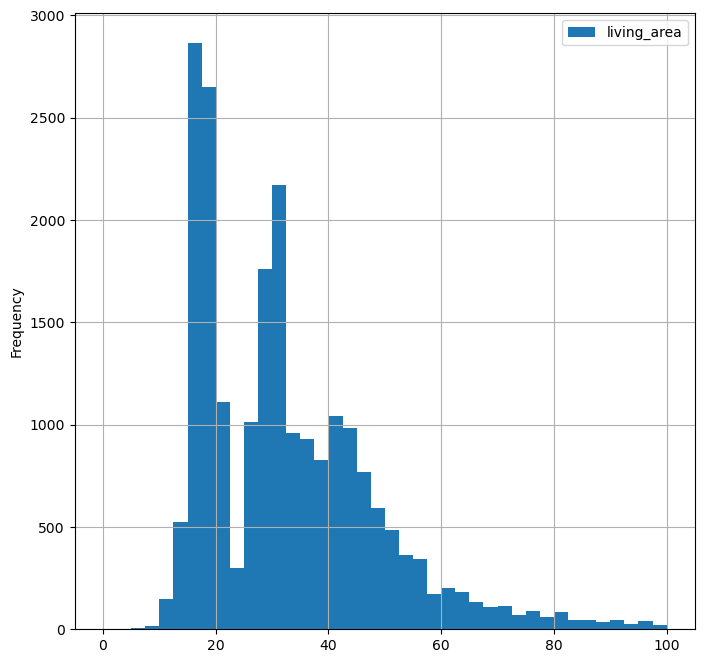

In [31]:
# жилая площадь

data = data[data['living_area'] < 100] # Уберем уиз выборки значения артефакты
data.plot(y = 'living_area', kind = 'hist', bins = 40, grid=True, figsize = (8,8), range = (0,100))
data['living_area'].describe()

*Жилая площадь выборки в диапозоне от 2 до 88 метров, средняя площадь 12,2, отклонение высокое 12.2. На гистограмме видно два пика - это жидая площадь 2ух самых популярных квартир - 1-комнатные и 2-комнатные квартры(самые популярные), что хорошо совпадает с предидуущим графиком, 2 пика общей площади и 2 пика жилой площади*

count    20539.000000
mean        10.262108
std          5.234676
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64

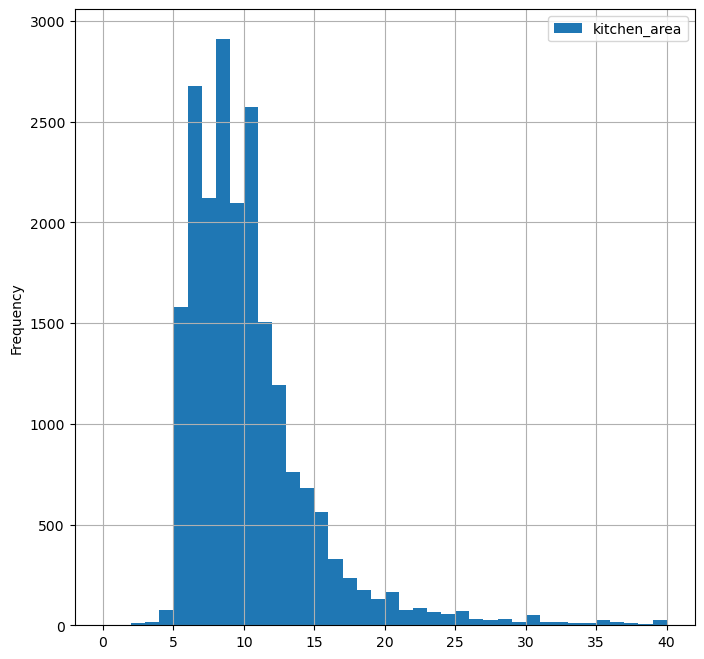

In [32]:
# Площадь кухни

data = data[data['kitchen_area'] < 100] 
data.plot(y = 'kitchen_area', kind = 'hist', bins = 40, grid=True, figsize = (8,8), range = (0,40))
data['kitchen_area'].describe()


*Площадь кухни выборки в диапозоне от 1,3 до 48 метров, средняя площадь 9,5, отклонение в норме 1,3. На гистограмме видно два пика - это площадь 2ух самых популярных квартир - 1-комнатные и 2-комнатные квартры, что хорошо совпадает с предидуущим графиками*

count    2.053900e+04
mean     5.912472e+06
std      5.963442e+06
min      1.219000e+04
25%      3.490000e+06
50%      4.650000e+06
75%      6.600000e+06
max      3.300000e+08
Name: last_price, dtype: float64

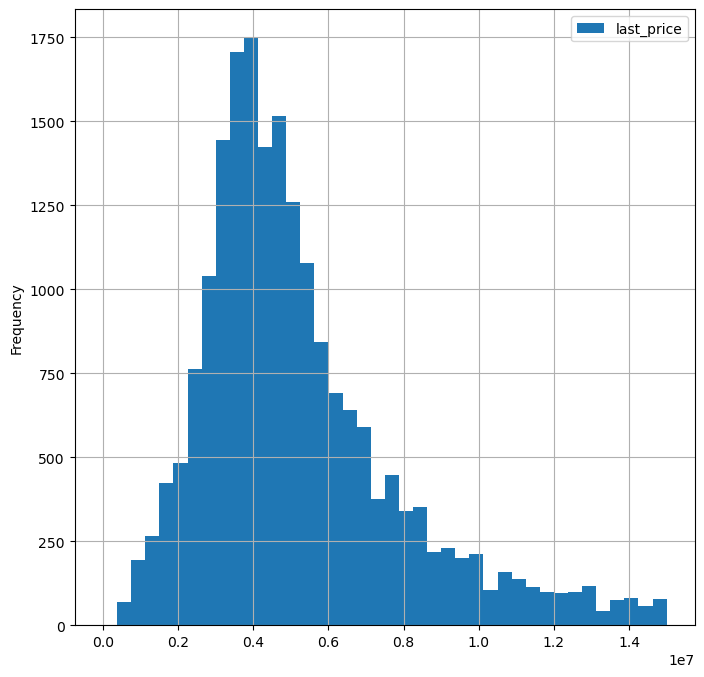

In [33]:
# Цена объекта
data['last_price'].round().astype("Int64")
data.plot(y = 'last_price', kind = 'hist', bins = 40, grid=True, figsize = (8,8), range = (0,15000000))
data['last_price'].describe()

*Цена объектов в диапозоне от 0,12 до 420 пунктов, средняя оценка 6,8, отклонение в норме 1. На гистограмме виден один пик, это говорит о том что данные в порядке, распредендение в норме.*

[3 1 2 4 6 5 7]


count    20539.000000
mean         2.034909
std          0.938875
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

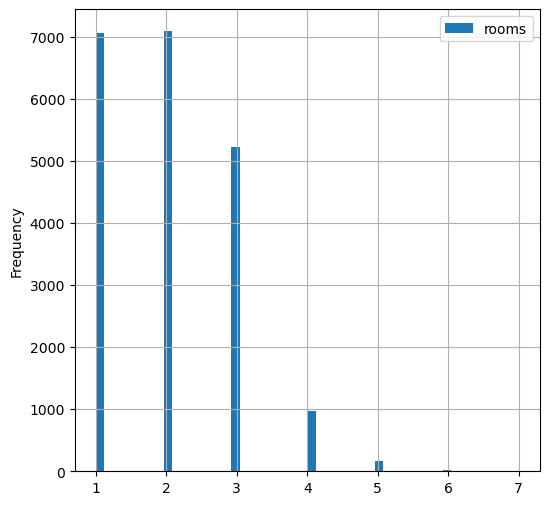

In [34]:
# Количество комнат

data.plot(y = 'rooms', kind = 'hist', bins = 50, grid=True, figsize = (6,6))
print(data['rooms'].unique()) # Проверим количество комнат по значениям
data['rooms'].describe()

*Количество комнат в диапозоне от 0 до 6, среднее количесво 2, отклонение в норме 1. Большинсвто квартр с 2мя комнатами, что поддтверждается графиками выше, на втором месте 1комнатные квартиры, студий и квартир с 6ью комнатами на минимуме.*

count    20539.000000
mean         2.691810
std          0.265582
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

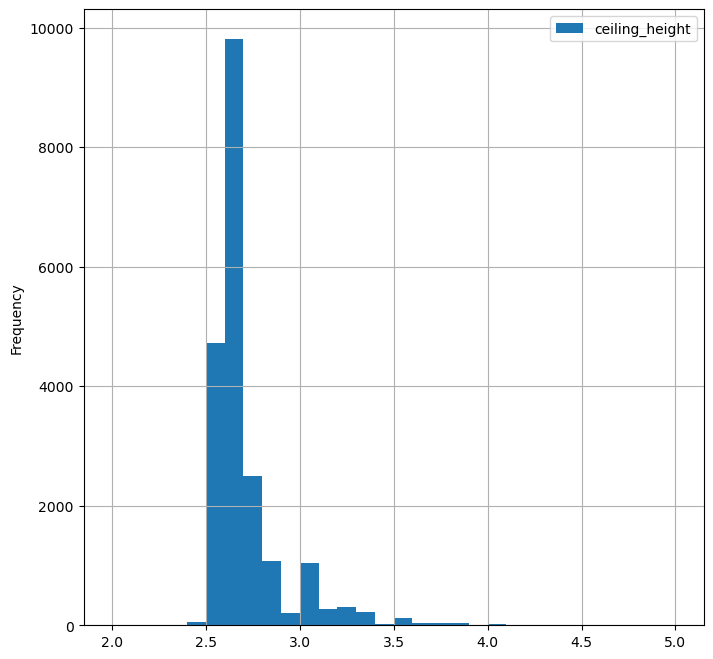

In [35]:
# Высота потолка

data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (8,8))
data['ceiling_height'].describe()



*Высота потолка от 2,2 до 5,8, средняя высота 2,2 отклонение в норме. Большинсвто квартр со стандартной высотой потолка 2,6м (это так называемые хрущевки, панельки)*

<AxesSubplot:>

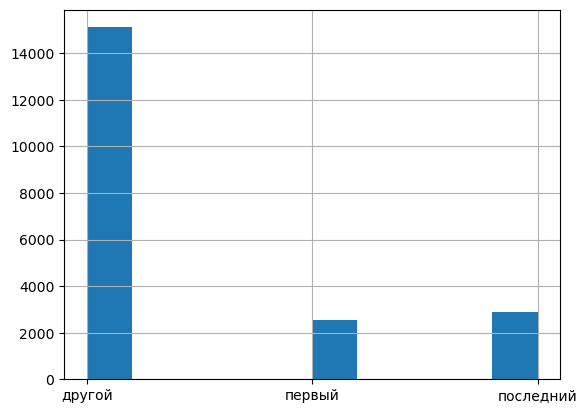

In [36]:
# Этаж квартиры

data['categoriya_flors'].hist()


*Большинство квартир не на первом и не на последнем этаже что логично*

count    20539.000000
mean        10.628852
std          6.535467
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

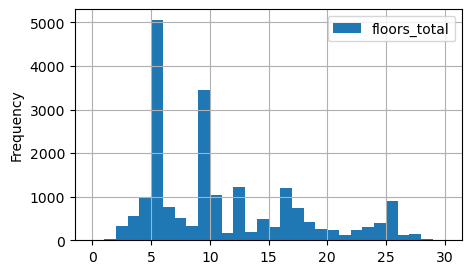

In [37]:
# общее количество этажей в доме

data.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (0,30), grid=True, figsize = (5,3))
data['floors_total'].describe()


*Большинство домом имеет 5 этажей (это хрущевки, брежневки), что  поддтверждает высота потолка, стандартнные в них. Так же большой пик в 9ажках не менее распространенные типовые панельные на просторах РФ. Остальные значения разноплановы, виднеется не большой пик около 25 этажей ("новостройки человейники"). Максимадьный этаж 60 -  что тоже возможно, так как в городе присутствует здание в 87 этажей (Лахта центр)*

count    15904.000000
mean        14.419555
std          8.633785
min          0.208000
25%          9.673250
50%         13.220500
75%         16.316000
max         65.968000
Name: cityCenters_nearest, dtype: float64

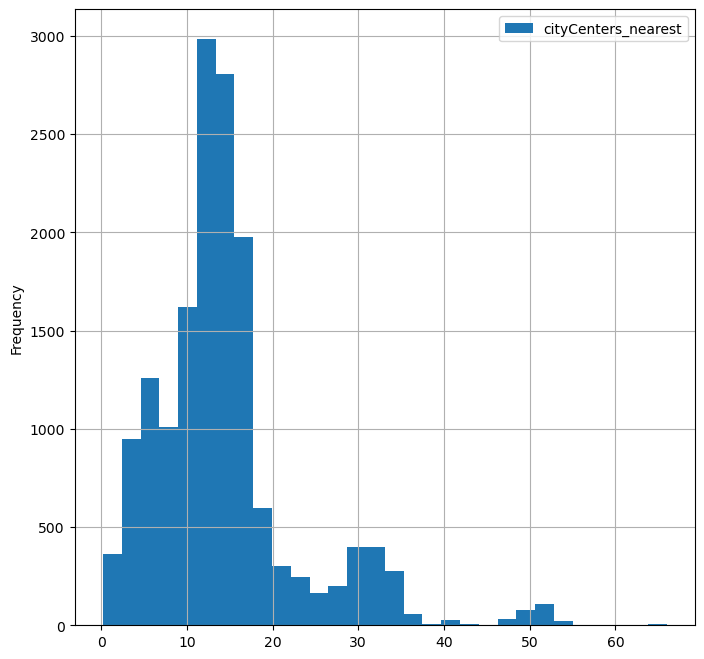

In [38]:
# Расстояние до центра

data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (8,8))
data['cityCenters_nearest'].describe()

*Среднее расстояние до центра 5,5 км, наиболее высокий пик около 15 км, что говорит о том, что большинство квартир находится в спальных районах вокрууг города, что тоже вполне сходится с действительностью*

count    15886.000000
mean     28855.820849
std      12736.849824
min          0.000000
25%      18428.000000
50%      26904.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

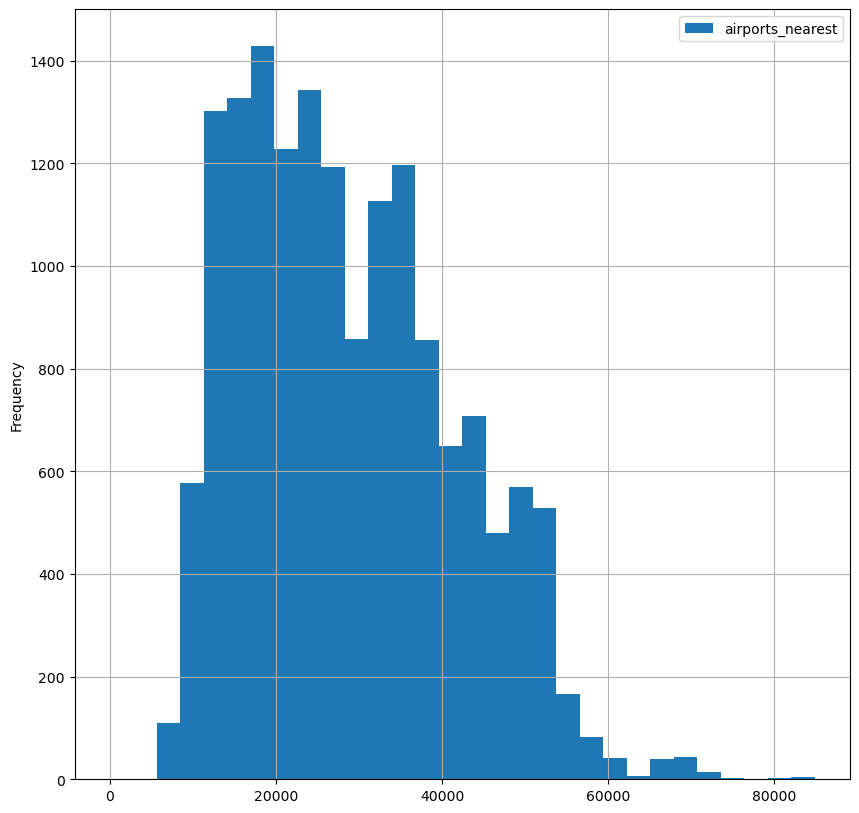

In [39]:
#Расстояние до аэропорта

data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (10,10))
data['airports_nearest'].describe()


*Среднее расстояние до аэропорта 28 км, минимальное расстояние 0, максимальное 61, вблизи аэропорта жилая застройка запрещена, поэтому дома дома начинаются на расстояния от аэропорта, значениние 0 говорит о том, что имеются дома, где до аэропорта очень далеко*

count    6997.000000
mean      489.926683
std       339.921165
min         1.000000
25%       288.000000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

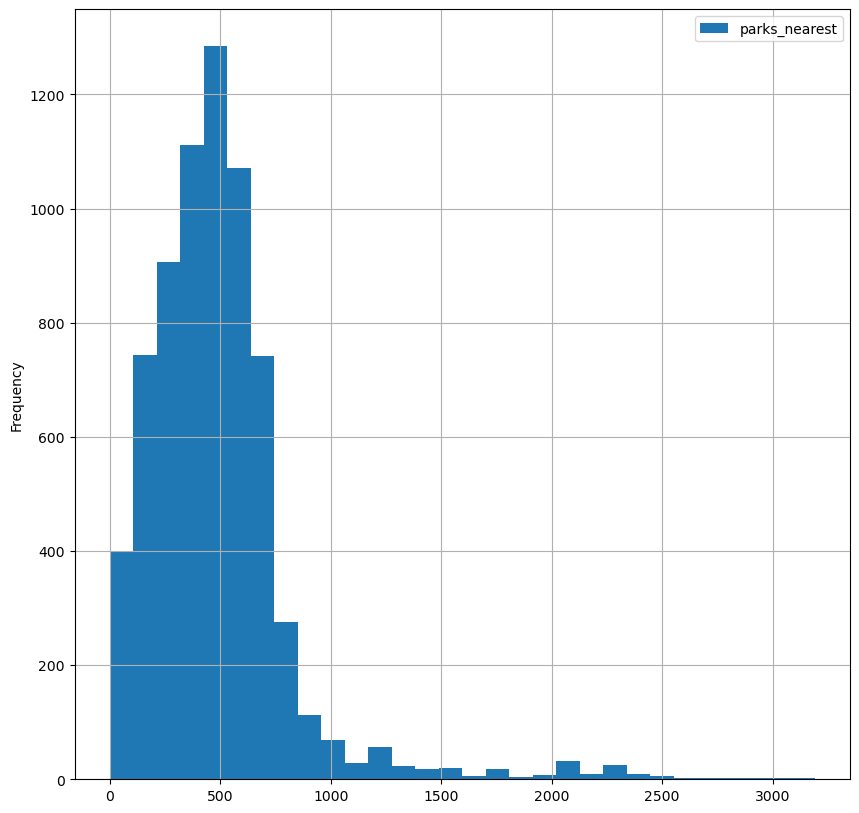

In [40]:
#Расстояние до парка

data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (10,10))
data['parks_nearest'].describe()


*Среднее расстояние до парка 485 м, минимальное расстояние 3м, максимальное 3,1 км пик графика один с более-менее равномерным распределением, парков в городах много и находятся они в центрах районов, поэтому квартиры находятся равномерно вокруг них.

<AxesSubplot:ylabel='Frequency'>

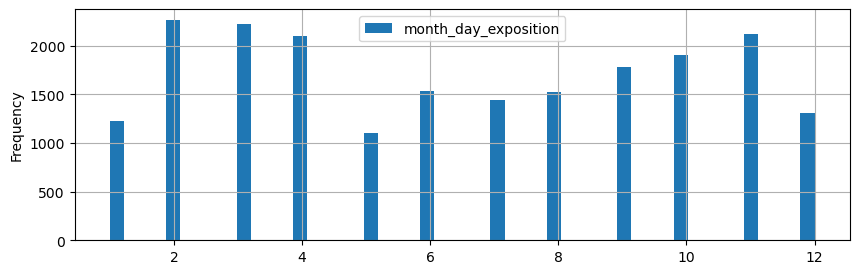

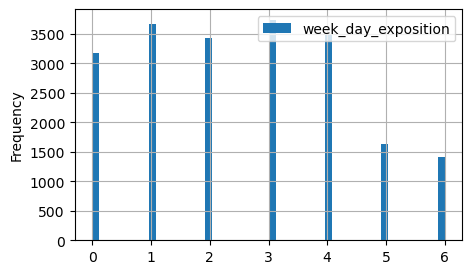

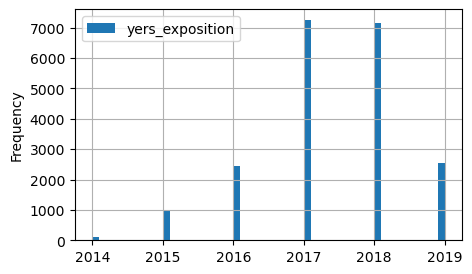

In [41]:
#День,месяц и год публикации

data.plot(y = 'month_day_exposition', kind = 'hist', bins = 50, grid=True, figsize = (10,3))
data.plot(y = 'week_day_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3))
data.plot(y = 'yers_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3))


*Больше всего крвартиры выставляют на продажуу в феврале, марте, в пн - вт - большенство объявлений выставляют риелторы, в рабочии дни с пн и со спадом в выходные, в январские праздники люди загадывают желания изменить свою жизнь и начинают менять её с февраля продавая жил площади*

*Большинство объявлений выложены в 2018 году и спад с 2019, нужно изучать законы спроса и предлодения на рынке в городе в целом, тут могут быть связаны, средняя ставка по ипотеке, экономическая ситуация в стране, запуски программ для строительных компаний*

**Как быстро продавались квартиры?**

Медиана равна -  100.0
Среднее равно -  183.52949461941517


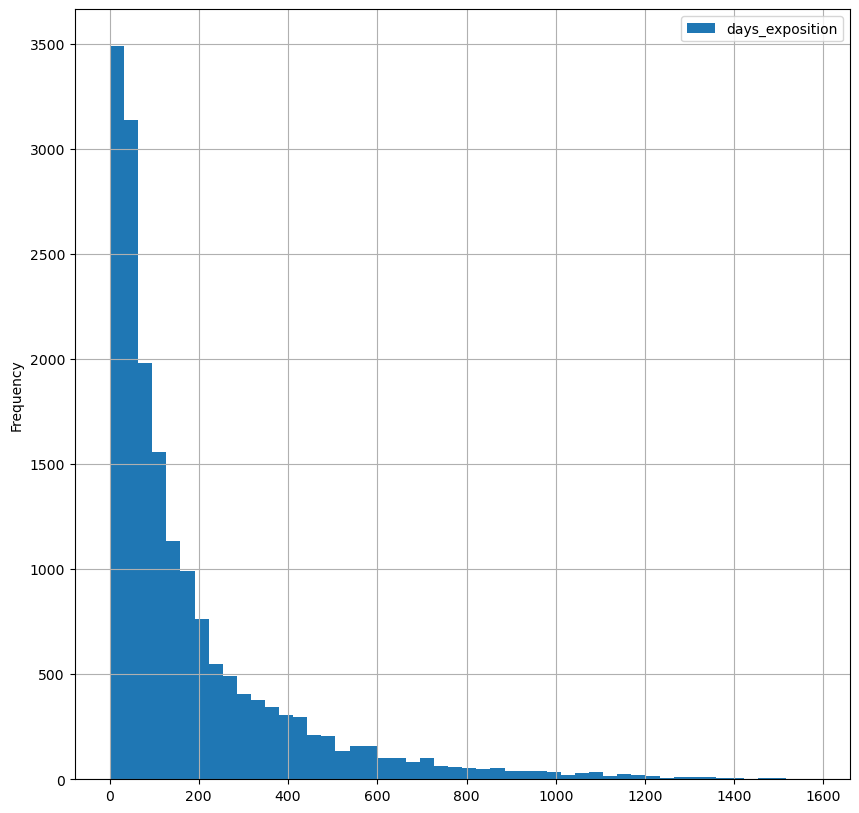

In [42]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (10,10))
days_exposition_median = data['days_exposition'].median()
days_exposition_mean = data['days_exposition'].mean()
print('Медиана равна - ',days_exposition_median)
print('Среднее равно - ',days_exposition_mean)

*Среднее арифметическое - суммированием всех чисел в выборке и делением полученной суммы на количество чисел. 
Медиана — это число, которое окажется строго по центру списка чисел в наборе данных, если их предварительно упорядочить по возрастанию. Получается квартиры продаются около 100 дней, чаще всего это случается, когда продавцы попадают в цену спроса и реалтзуют свой объет*

**Факторы больше всего влияюшие на общуюстоимость объекта**

**Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный.
Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0.
Если рост одной величины связан с уменьшением другой, коэффициент отрицательный.**

0.6341632088657081

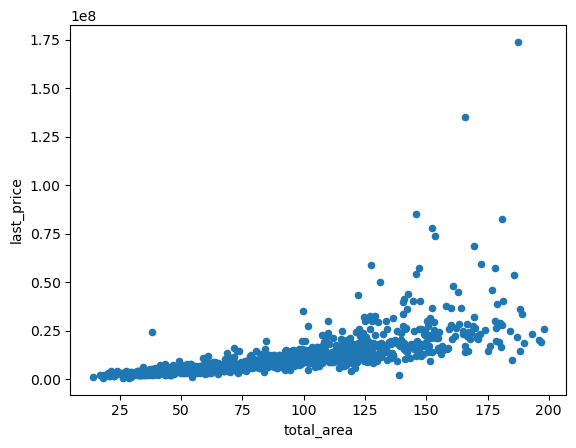

In [43]:
# Общая площадь, подготовливаем сводную таблицу из значений общая площадь и цена

data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='total_area')
data['total_area'].corr(data['last_price']) # Коэффициент корреляции этих двух парпметров

*Чем больше площадь, тем больше стоимость, корреляцияя 0,62, она не высокая, но есть*

0.5061820241835908

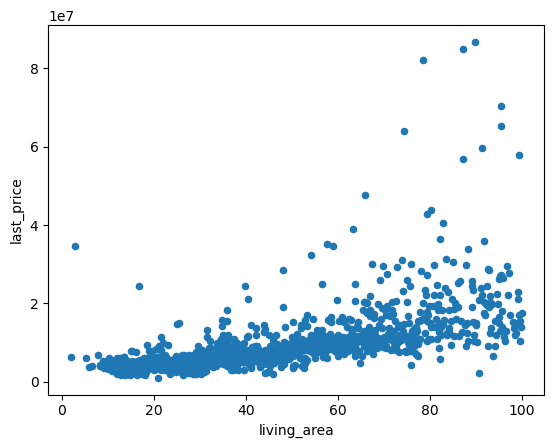

In [44]:
# Жилая площадь

data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='living_area')
data['living_area'].corr(data['last_price'])

*Чем больше Жилая площадь, тем больше стоимость, корреляцияя 0,47 зависимость больше, чем от общей площади*

0.5167251986246167

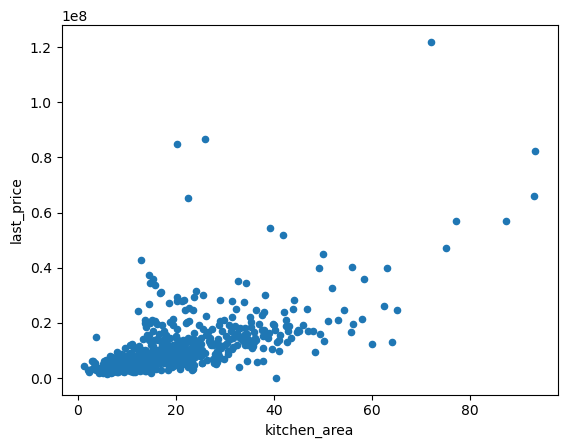

In [45]:
# Площадь кухни

data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='kitchen_area')
data['kitchen_area'].corr(data['last_price'])

*Чем больше площадь кухни, тем больше стоимость, корреляцияя 0,48 зависимость больше, чем от общей площади, такаяя же как от жилой площади*

<AxesSubplot:xlabel='rooms'>

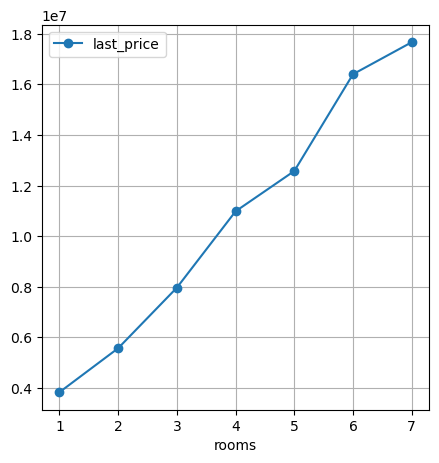

In [46]:
# Количество комнат

data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

*Чем больше комнат, тем больше стоимость*

<AxesSubplot:xlabel='categoriya_flors'>

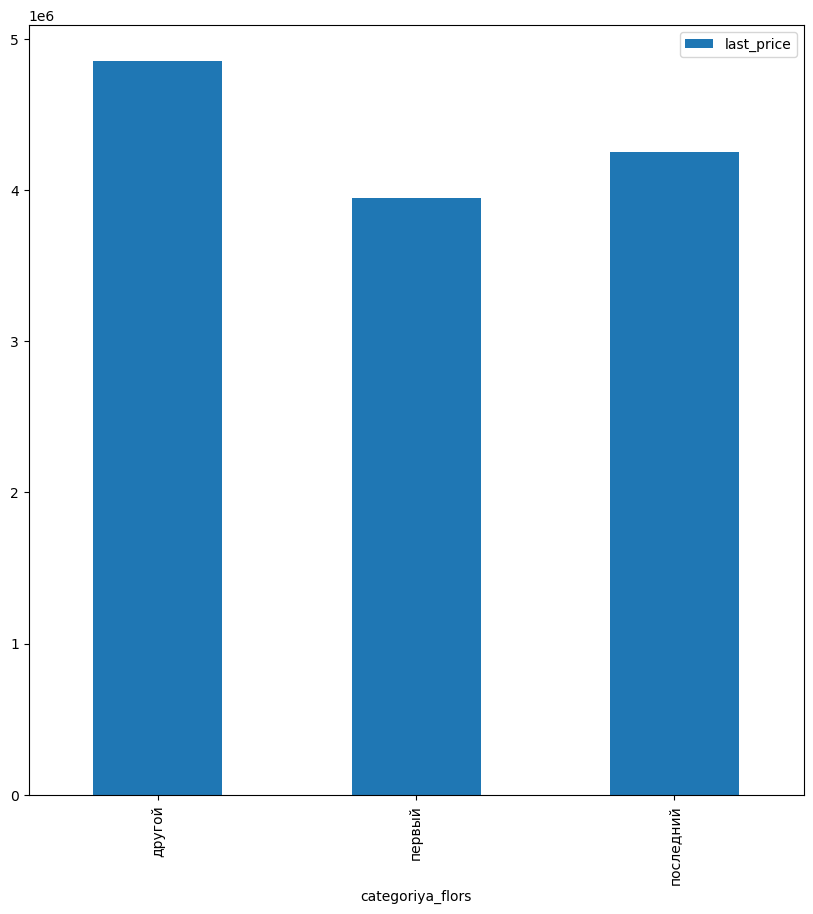

In [47]:
# Количество этажей

data.pivot_table(index='categoriya_flors', values='last_price', aggfunc='median').reset_index().plot(kind='bar', y='last_price', x='categoriya_flors', figsize = (10,10))


*Как часто бывает первый этаж  дешевале, чем все остальные этажи, последний этаж на том же уровне, что и остальные*

<AxesSubplot:xlabel='yers_exposition'>

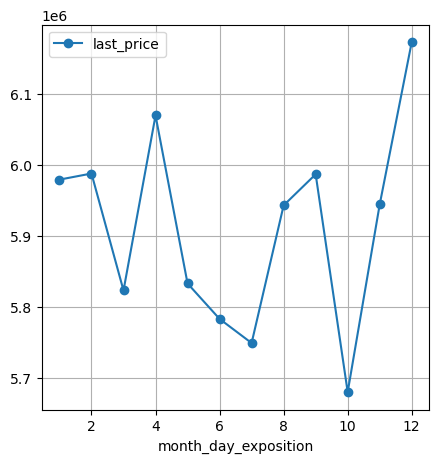

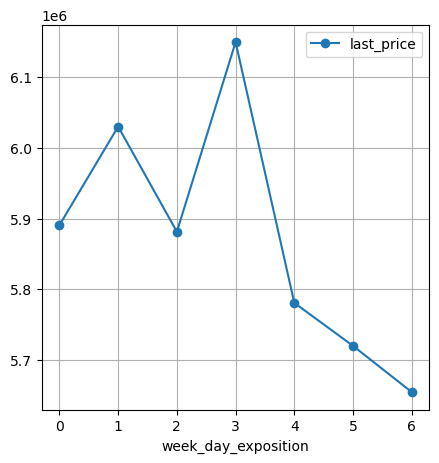

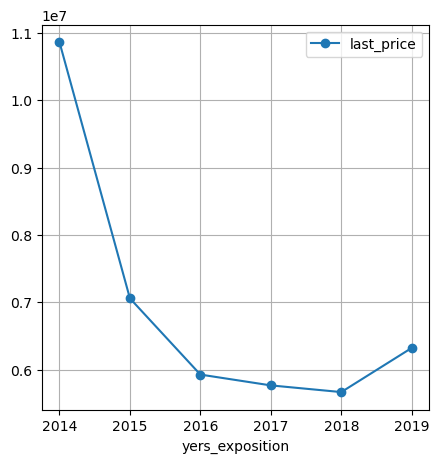

In [48]:
# Дата размещения

data.pivot_table(index='month_day_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='week_day_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='yers_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))


*в Январие, Апреле и Декабре самые дорогие объявления, выше всего свои квартры оценивают риелторы в среду в разгар рабочей недели, а ниже всего уже собственники по выходным расслаблясь дома.
Квартиры очень сильно подешевели с 2015-2018 год, что говрит о том что закон спроса и предложения работает, а так же что в 2014 произшли загадочные события, после которых экономика вместе с ценой на квартиры пошли вниз и шли так до 2019 года*

**Средняя цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [49]:
# Методом query объединеняем условия наименования всех населённых пунктов в ранее построенной таблице top_ten_cost_max
# далее создаёс сводную таблицу методом pivot_table price_metr и locality_name

top_ten_cost = data['locality_name'].value_counts().head(10) # топ 10 по количествуу объявлений 
top_ten_cost_max = data.query('locality_name in (@top_ten_cost.index)').pivot_table(values='price_metr', index='locality_name')
top_ten_cost_max = top_ten_cost_max.astype('int') # переводим в целые числа 
top_ten_cost_max.sort_values('price_metr', ascending=False) # группируем по возрастанию  


,price_metr
locality_name,
Санкт-Петербург,112509
Пушкин,103207
деревня Кудрово,92248
поселок Парголово,90755
поселок Мурино,85366
Петергоф,83834
поселок Шушары,78393
Колпино,75129
Всеволожск,69028


*Получается сводная таблица топа 10 населённых пуунктов по максимальной стоимости квадратного метра. На первом месте как и следовало ожтдать крупнейший центр региона - Санкт-Петербург*

In [50]:
top_ten_cost_max.sort_values(by='price_metr',ascending=False).head(1)

,price_metr
locality_name,
Санкт-Петербург,112509


**Самый высокий показатель в самом крупном горде, что вполне закономерно в Санкт-Петербурге**

In [51]:
# Проводим тем же операции но в ранее построенной выборке top_ten_cost_min

top_ten_cost_min = data.query('locality_name in (@top_ten_cost.index)').pivot_table(values='price_metr', index='locality_name')
top_ten_cost_min = top_ten_cost_min.astype(int)
top_ten_cost_min.sort_values('price_metr').head(10)

,price_metr
locality_name,
Гатчина,68689
Всеволожск,69028
Колпино,75129
поселок Шушары,78393
Петергоф,83834
поселок Мурино,85366
поселок Парголово,90755
деревня Кудрово,92248
Пушкин,103207


In [52]:
top_ten_cost_min.sort_values(by='price_metr').head(1)

,price_metr
locality_name,
Гатчина,68689


**Самый низкий показатель в посёлке Лисий Нос**

**После исправления, Гатчина замкнула список**

**Выделяем квартиры в Санкт-Петербурге с помощью столбца locality_name и вычисляем среднюю цену каждого километра**

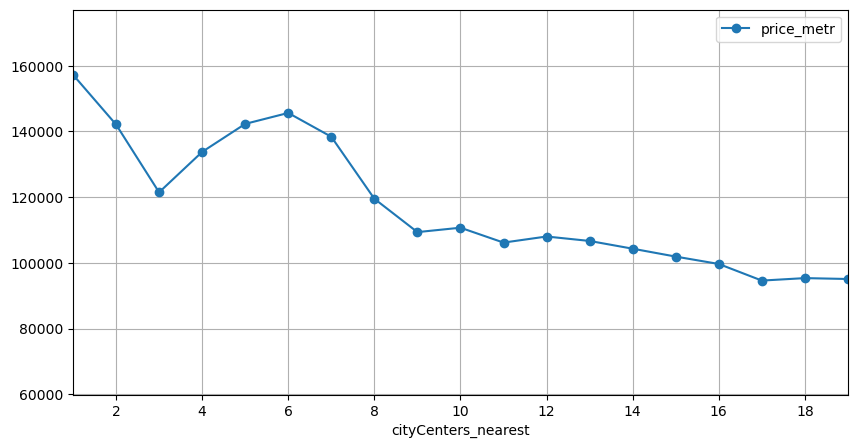

In [53]:
data['cityCenters_nearest'] = np.floor(pd.to_numeric(data['cityCenters_nearest'], errors='coerce')).astype('Int64'); 
spb_best = data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = 'cityCenters_nearest', values = 'price_metr', aggfunc = 'mean');
spb_best.plot(grid=True, style='o-', xlim=(1,19), figsize=(10, 5));



**Самый высокий ценнк в самом центре где находятся знаменитые элитные доходные дома СПБ, далее ценник начинает снижаться из-за комунальных квартир всё еще оцень распространённых в близи от центра, и дальше идуут новые дома вне старнииой застройки с максимальной цено кв метра и далее по далению ценник снижается с удалением от центра**

на мой взгляд на 6ом, с началом понижения цены

<div style="border:solid blue 2px; padding: 20px">
ВЫВОД:
    
Изучены параметры объектов, построены отдельные гистограммы для каждого объекта изуучения, описаны наблюдения по параметрам:
    
1. общая площадь;    
2. жилая площадь;
3. площадь кухни;
4. цена объекта;
5. количество комнат;
6. высота потолков;
7. этаж квартиры;
8. тип этажа квартиры;
9. общее количество этажей в доме;
10. расстояние до центра города в метрах;.
11. расстояние до ближайшего аэропорта;
12. расстояние до ближайшего парка;
13. день и месяц публикации объявления.
    
Изучено, как быстро продавались квартиры - Медиана равна -  69.5
    
Изучены как факторы влияют на общую стоимость объекта
    
Посчитана средня цена в топ макс и топ мин населённых пунктах выборки
    
Изучено, как расстояние от центра влияет на цену квадратного метра

<div class="alert alert-info"> <b><div style="border:solid blue 2px; padding: 20px">
Проделана работа по изучению данных в первом пункте, во втором пункте нашей работы мы привели данные  в надлежащий вид для дальнейших преобразований и вычислений, на третем шаге добавлены в таблицу новые столбцы для финальных расчетов и на четвертом шаге я изучил как быстро продавались квартиры, какие факторы влияют на стоимость кв м, и в каких населенных пунктах и в какое время стоимость кв м максимальна иили минимально, данное исследование может быть полезно для строительных космпаний - в каких населенных пунктах стоимость кв метра выше или ниже, риелторский агенств - изена связи цен, площадок выставлений объявлений - в какие дни и месяца серверы должны быть особенно загружены